# Análisis de Datos 
## Campaña de Marketing Banco

Este proyecto trata de analizar los datos de una campaña de marketing siendo estas **41.188** llamadas telefónicas realizadas a los clientes de una entidad bancaria portuguesa.

**El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo.**

link data: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

En este supuesto práctico he utilizado diferentes modelos de algoritmos para sacar la mejor predicción al problema. Por ejemplo: **Teorema de Bayes, Regresión Logística, Soporte Vectorial, etc.**

Tecnologías utilizadas: **Anaconda, Spyder, Python, TensorFlow, Pandas, Sklearn y Xgboost.**

### Librerias

In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

### Clase Algoritmos
Esta clase se encargará de calcular la precisión de los algoritmos siempre y cuando inicialice correctamente el constructor con sus parametros correctos. Después solo hay que llamar a la funcion **precision()**. También almacenará los datos de precisión en un dataframe para una consulta posterior en el apartado de la conclusión.

In [36]:
datos = {'Nombre_Algoritmo':[], 'Precision':[]}  
df = pd.DataFrame(data=datos) 

class Algoritmos:
    
    def __init__(self,nombre,cm, y_test):
        self.nombre = nombre
        self.cm = cm
        self.y_test = y_test
        
    def __str__(self):
        return (self.nombre)
        
    def precision(self):
        global df
        assert(self.cm.shape==(2,2))
        assert(type(self.y_test) == pd.DataFrame)
        assert(type(self.cm[0][0]) == np.int64)
        precision_02 = ((self.cm[0][0] + self.cm[1][1])/len(self.y_test)) * 100
        assert(type(precision_02) == np.float64)
        df = df.append({'Nombre_Algoritmo':self.nombre, 'Precision':precision_02}, ignore_index=True)
        return("%.2f" %precision_02)

###  Carga y Visualización de datos

In [5]:
# PATH
path = "C:/Users/USUARIO/Desktop/Data_Bank_Marketing/"
data = pd.read_csv(path + "bank-additional-full.csv", delimiter=';')

In [9]:
data # Visualización de datos

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
# Visualizacióz datos
print(data.head(10))

   age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   m

In [8]:
print(data.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

### Preprocesado de datos
En los datos existe una relación dependiente entre la duración de la llamada y el resultado de que realice depósito o no, es decir, si la duración de la llamada es 0 evidentemente no realiza un deposito y como esto lo conocería el algoritmo a priori no serían realistas las predicciones. De modo que las excluyo de los datos.

In [18]:
show = data[data.duration  == 0] # estas son las filas con duracion = 0s, son 4
show.duration

6251     0
23031    0
28063    0
33015    0
Name: duration, dtype: int64

In [14]:
# Saco los índices y las elimino
index_0 = show.index
data_0 = data.drop(index_0, axis = 0)

In [16]:
data_0 # Ahora tengo 41.184 datos en vez de 41.188

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [19]:
# Compruebo si hay alguna celda con valor nulo
print(data.isnull().sum()) # ningun dato nulo

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Transformacíon de datos

Almaceno las columnas que considero variables independientes y dependiente, por ejemplo en este supuesto todas las columnas tienen un peso estadístico en el problema de modo que no me deshago de ninguna. El siguiente paso es considerar quien es la variable dependiente y las variables independientes:

- El objetivo de este supesto es predecir la columna **'y'** para saber si el cliente ha realizado un deposito con la campaña de marketing. De modo que la columna **Y será la variable dependiente**.

- Como he dicho antes, todas las columnas tienen su importancia en este problema entonces **las variables independietes seran todas las columnas menos Y**

In [20]:
X = data_0.iloc[:, 0:-1]
Y = data_0.iloc[:, -1:]

En el dataframe existen variables tipo object de modo que las transformo con el metodo **LabelEnconder()**. Previamente recojo por la condiccion if el tipo object para que solo me seleccione las columnas que son tipo object. Asi el modelo podrá **reconocer los objetos como números**.

In [21]:
# Transformacion de las variables objetos a numericos
objeto = X['job'].dtypes
max = len(X.columns)
le = LabelEncoder()

Y.iloc[:,0] = le.fit_transform(Y.iloc[:,0]) # Cambiamos yes y no por 0 y 1

# Codificamos los objetos para cada columna
for i in range(max):
    if ( X.iloc[:,i].dtypes == objeto):
        X.iloc[:, i] = le.fit_transform(X.iloc[:, i])

In [23]:
X # Visualizacion de la codificación

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


### TRAIN Y TEST
Después de limpiar, preprocesar los datos, considerar que columnas son irrelavantes para nuestro modelo y transformar nuestros dato tipo objeto a numérico ahora ya se pasaría a la fase de división de datos, es decir, considerar cuanto porcentaje de datos del dataset sería para entrenar nuestro modelo y el otro para testearlo y verificar su precisión. Normalmente:

- **TRAIN**, tiene el 80% de datos del dataset original ya que cuanto más datos más comprobaciones realizará y más fiable será.
- **TEST**, tiene el 20% de datos del dataset original y con él se mide la precisión.

Como sería un proceso muy laborioso hacerlo manualmente con está gran cantidad de datos hay una función en Python del modulo **sklearn** llamada **train_test_split** que nos facilita esta división de datos.

In [24]:
# Dividimos los datos usando la funcion train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=(0))

# Escalado de variables, la edad toma variables fijas
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Algoritmo Regresión Logística
La regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras.

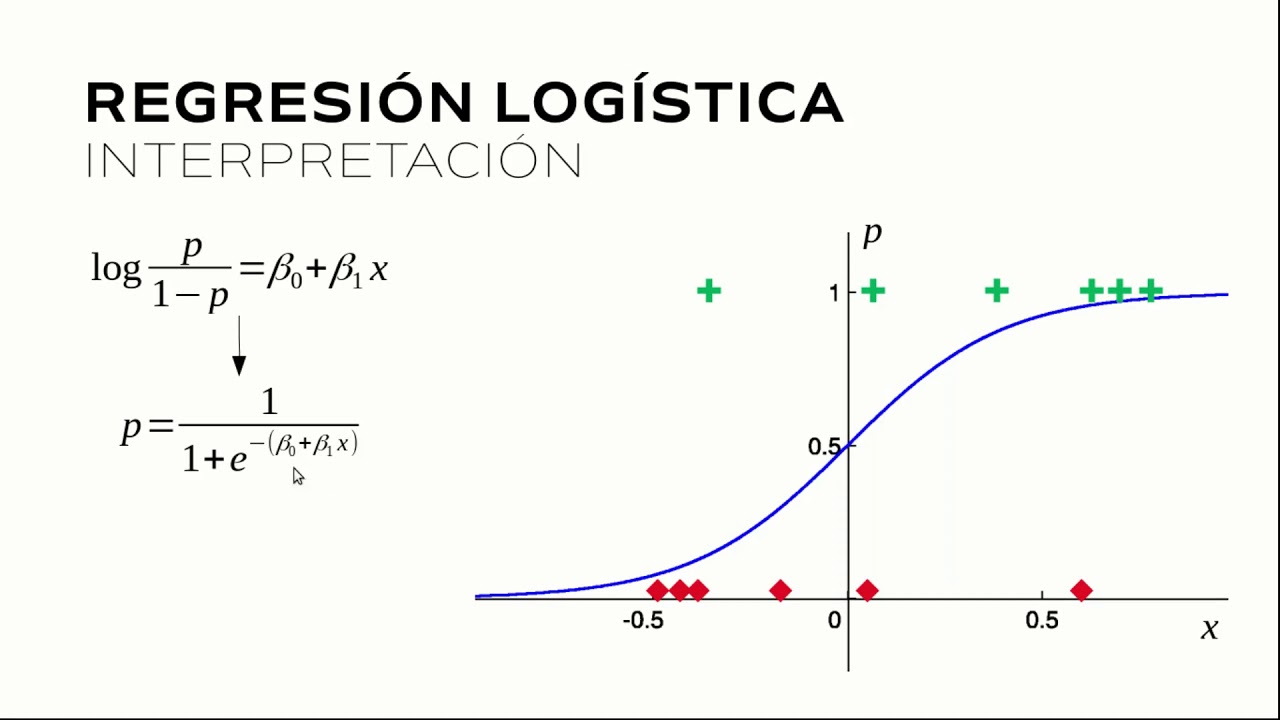

In [28]:
Image("C:/Users/USUARIO/Desktop/Data_Bank_Marketing/reglogist.jpg")

In [37]:
LogisticR = LogisticRegression(random_state=0) # random state = 0
LogisticR.fit(X_train, y_train) #Ajustamos el modelo

# Realizamos la predicción de los resultados con el conjunto de testing
y_pred = LogisticR.predict(X_test)

# Matriz de confusion
# De los 8237 entradas de clientes
cm = confusion_matrix(y_test, y_pred) # 91,23% de precision
cm

array([[7121,  194],
       [ 528,  394]], dtype=int64)

In [38]:
Logist = Algoritmos('Regresión Logística', cm, y_test)
Logist.precision()

'91.23'

### Algoritmo KNN (K Vecinos más cercanos)

Este algoritmo es un clasificador de aprendizaje supervisado no paramétrico, que utiliza la proximidad para hacer clasificaciones o predicciones sobre la agrupación de un punto de datos individual. Si bien se puede usar para problemas de regresión o clasificación, generalmente se usa como un algoritmo de clasificación, partiendo de la suposición de que se pueden encontrar puntos similares cerca uno del otro.

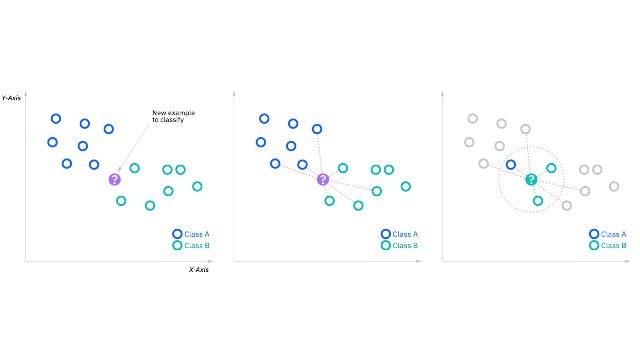

In [40]:
Image("C:/Users/USUARIO/Desktop/Data_Bank_Marketing/KNN.png")

In [41]:
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Objeto clasifier
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred) # 89.85% de precision

In [42]:
KNN = Algoritmos('KNN Vecinos Cercanos', cm, y_test)
KNN.precision()

'89.85'

### Algoritmo de Máquina Soporte Vectorial 
Estos métodos están propiamente relacionados con problemas de clasificación y regresión. Dado un conjunto de ejemplos de entrenamiento (de muestras) podemos etiquetar las clases y entrenar una SVM para construir un modelo que prediga la clase de una nueva muestra. Intuitivamente, una SVM es un modelo que representa a los puntos de muestra en el espacio, separando las clases a 2 espacios lo más amplios posibles mediante un hiperplano de separación definido como el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama vector soporte. Cuando las nuevas muestras se ponen en correspondencia con dicho modelo, en función de los espacios a los que pertenezcan, pueden ser clasificadas a una o la otra clase.

**Este algoritmo tiene distintos kernels para usar, solo he utilizado sigmoid y linear**

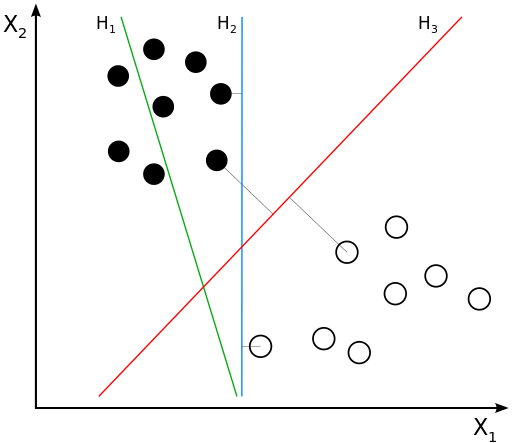

In [44]:
Image("C:/Users/USUARIO/Desktop/Data_Bank_Marketing/SVN.png")

In [45]:
SVC04 = SVC(kernel = 'sigmoid', random_state = 0) # KERNEL sigmoide DEFINE LA SEPARACION
SVC04.fit(X_train, y_train)

y_pred = SVC04.predict(X_test)
cm = confusion_matrix(y_test, y_pred) # 86.91% de precision

In [46]:
SVN = Algoritmos('Soporte Vectorial Machine Sigmoide', cm, y_test)
SVN.precision()

'86.91'

In [48]:
SVC01 = SVC(kernel = 'linear', random_state = 0) # KERNEL linear DEFINE LA SEPARACION
SVC01.fit(X_train, y_train)

y_pred = SVC01.predict(X_test)
cm = confusion_matrix(y_test, y_pred) # 90,12% de precision

In [49]:
SVN02 = Algoritmos('Soporte Vectorial Machine Lineal', cm, y_test)
SVN02.precision()

'90.13'

### Algoritmo de XGBOOST
XGBoost es una biblioteca de aumento de gradiente distribuida optimizada diseñada para ser altamente eficiente , flexible y portátil . Implementa algoritmos de aprendizaje automático bajo el marco Gradient Boosting . XGBoost proporciona un impulso de árbol paralelo (también conocido como GBDT, GBM) que resuelve muchos problemas de ciencia de datos de una manera rápida y precisa

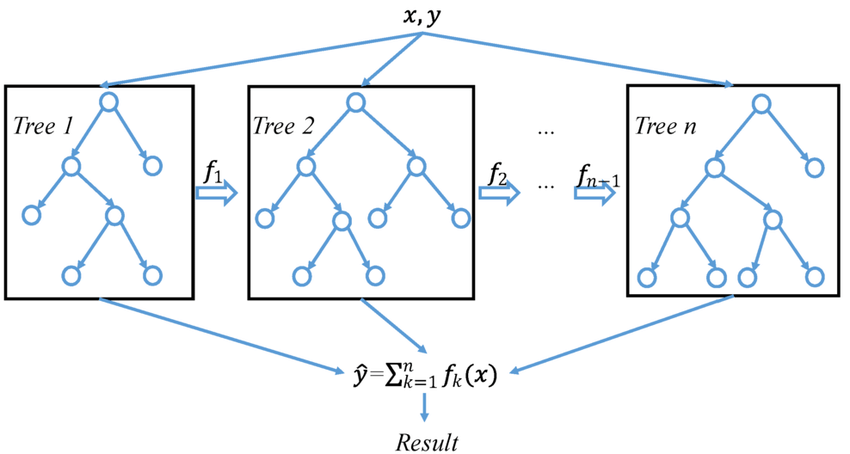

In [51]:
Image("C:/Users/USUARIO/Desktop/Data_Bank_Marketing/xgboost.png")

In [52]:
XGBOOST = XGBClassifier()
XGBOOST.fit(X_train, y_train)

y_pred = XGBOOST.predict(X_test)
cm = confusion_matrix(y_test, y_pred) # 91,51% precision

In [53]:
xgbost = Algoritmos('XGBOOST', cm, y_test)
xgbost.precision()

'91.51'

### Algoritmo Red Neuronal Artificial
Una red neuronal es un modelo simplificado que emula el modo en que el cerebro humano procesa la información: Funciona simultaneando un número elevado de unidades de procesamiento interconectadas que parecen versiones abstractas de neuronas.

Las unidades de procesamiento se organizan en capas. Hay tres partes normalmente en una red neuronal : una capa de entrada, con unidades que representan los campos de entrada; una o varias capas ocultas; y una capa de salida, con una unidad o unidades que representa el campo o los campos de destino. Las unidades se conectan con fuerzas de conexión variables (o ponderaciones). Los datos de entrada se presentan en la primera capa, y los valores se propagan desde cada neurona hasta cada neurona de la capa siguiente. al final, se envía un resultado desde la capa de salida.

La red aprende examinando los registros individuales, generando una predicción para cada registro y realizando ajustes a las ponderaciones cuando realiza una predicción incorrecta. Este proceso se repite muchas veces y la red sigue mejorando sus predicciones hasta haber alcanzado uno o varios criterios de parada.

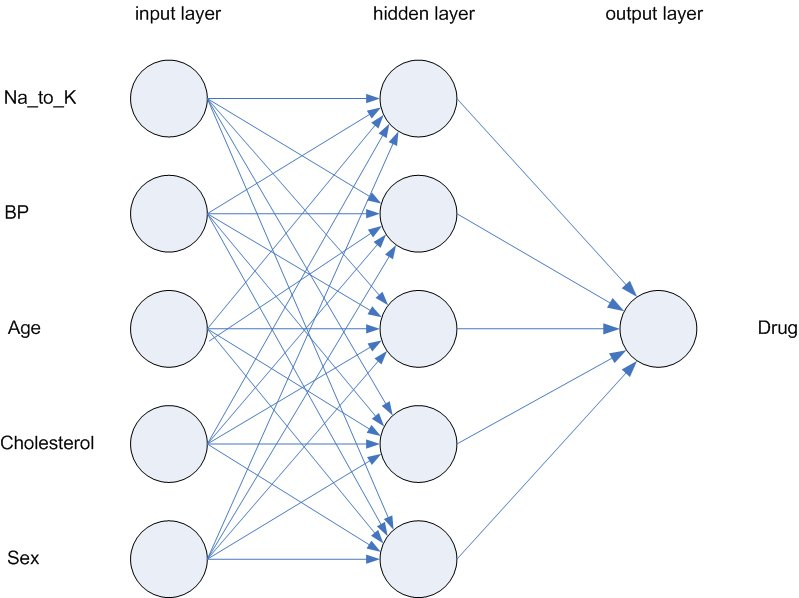

In [56]:
Image("C:/Users/USUARIO/Desktop/Data_Bank_Marketing/NNA.jpg")

In [57]:
# Construir la red neuronal artificial con keras del modelo secuencial
RNA = tf.keras.models.Sequential()

# 1º Capa de inputs
RNA.add(tf.keras.layers.Dense(units=10, activation='relu'))
# 2º Capa oculta de 6 nodos
RNA.add(tf.keras.layers.Dense(units=10, activation='relu'))
# Ultima capa de salidad, con funcion sigmoide
RNA.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

RNA.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
RNA.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1030/1030 [==============================] - 8s 5ms/step - loss: 0.2615 - accuracy: 0.9003
Epoch 2/200
1030/1030 [==============================] - 3s 3ms/step - loss: 0.2023 - accuracy: 0.9086
Epoch 3/200
1030/1030 [==============================] - 5s 4ms/step - loss: 0.1968 - accuracy: 0.9090
Epoch 4/200
1030/1030 [==============================] - 5s 4ms/step - loss: 0.1942 - accuracy: 0.9102
Epoch 5/200
1030/1030 [==============================] - 5s 5ms/step - loss: 0.1922 - accuracy: 0.9102
Epoch 6/200
1030/1030 [==============================] - 5s 5ms/step - loss: 0.1906 - accuracy: 0.9119
Epoch 7/200
1030/1030 [==============================] - 6s 6ms/step - loss: 0.1897 - accuracy: 0.9114
Epoch 8/200
1030/1030 [==============================] - 6s 6ms/step - loss: 0.1886 - accuracy: 0.9124
Epoch 9/200
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1881 - accuracy: 0.9120
Epoch 10/200
1030/1030 [==============================] - 3s 3ms/step - l

1030/1030 [==============================] - 3s 3ms/step - loss: 0.1753 - accuracy: 0.9163
Epoch 80/200
1030/1030 [==============================] - 4s 3ms/step - loss: 0.1750 - accuracy: 0.9159
Epoch 81/200
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1749 - accuracy: 0.9167
Epoch 82/200
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1750 - accuracy: 0.9166
Epoch 83/200
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1747 - accuracy: 0.9157
Epoch 84/200
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1743 - accuracy: 0.9167
Epoch 85/200
1030/1030 [==============================] - 7s 7ms/step - loss: 0.1748 - accuracy: 0.9168
Epoch 86/200
1030/1030 [==============================] - 5s 5ms/step - loss: 0.1748 - accuracy: 0.9162
Epoch 87/200
1030/1030 [==============================] - 4s 4ms/step - loss: 0.1747 - accuracy: 0.9161
Epoch 88/200
1030/1030 [==============================] - 7s 6ms/step - loss:

1030/1030 [==============================] - 3s 3ms/step - loss: 0.1729 - accuracy: 0.9166
Epoch 158/200
1030/1030 [==============================] - 4s 3ms/step - loss: 0.1728 - accuracy: 0.9169
Epoch 159/200
1030/1030 [==============================] - 4s 3ms/step - loss: 0.1728 - accuracy: 0.9174
Epoch 160/200
1030/1030 [==============================] - 4s 4ms/step - loss: 0.1728 - accuracy: 0.9164
Epoch 161/200
1030/1030 [==============================] - 4s 3ms/step - loss: 0.1728 - accuracy: 0.9163
Epoch 162/200
1030/1030 [==============================] - 4s 3ms/step - loss: 0.1727 - accuracy: 0.9173
Epoch 163/200
1030/1030 [==============================] - 4s 4ms/step - loss: 0.1728 - accuracy: 0.9168
Epoch 164/200
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1729 - accuracy: 0.9178
Epoch 165/200
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1725 - accuracy: 0.9165
Epoch 166/200
1030/1030 [==============================] - 3s 3ms/ste

In [59]:
y_pred = RNA.predict(X_test)
y_pred_02 = (y_pred > 0.5)
y_pred_02 = np.where(y_pred_02=='True',1,y_pred_02)
cm = confusion_matrix(y_test, y_pred_02)

In [60]:
NNA = Algoritmos('Red Neuronal Artificial', cm, y_test)
NNA.precision()

'91.70'

In [61]:
df

,Nombre_Algoritmo,Precision
0,Regresión Logística,91.234673
1,KNN Vecinos Cercanos,89.850674
2,Soporte Vectorial Machine Sigmoide,86.912711
3,Soporte Vectorial Machine Lineal,90.129902
4,XGBOOST,91.513901
5,Red Neuronal Artificial,91.696006


### Algoritmo Teorema de Bayes
El teorema de Bayes es utilizado para calcular la probabilidad de un suceso, teniendo información de antemano sobre ese suceso. Podemos calcular la probabilidad de un suceso A, sabiendo además que ese A cumple cierta característica que condiciona su probabilidad. El teorema de Bayes entiende la probabilidad de forma inversa al teorema de la probabilidad total. El teorema de la probabilidad total hace inferencia sobre un suceso B, a partir de los resultados de los sucesos A. Por su parte, Bayes calcula la probabilidad de A condicionado a B.

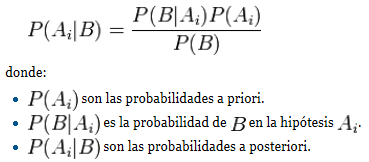

In [58]:
Image("C:/Users/USUARIO/Desktop/Data_Bank_Marketing/bayes.png")

In [64]:
BAYES = GaussianNB()
BAYES.fit(X_train, y_train)

y_pred = BAYES.predict(X_test)
cm = confusion_matrix(y_test, y_pred) # 84.90% de precision

In [65]:
bay = Algoritmos('Teorema de Bayes', cm, y_test)
bay.precision()

'84.91'

In [67]:
df

,Nombre_Algoritmo,Precision
0,Regresión Logística,91.234673
1,KNN Vecinos Cercanos,89.850674
2,Soporte Vectorial Machine Sigmoide,86.912711
3,Soporte Vectorial Machine Lineal,90.129902
4,XGBOOST,91.513901
5,Red Neuronal Artificial,91.696006
6,Teorema de Bayes,84.909554


### Conclusión
Tras procesar los datos con distintos algoritmos, puedo observar en mi dataframe **df** las distintas precisiones de estos y cuales son las mejores.

In [69]:
df.sort_values(by='Precision',ascending=False)

,Nombre_Algoritmo,Precision
5,Red Neuronal Artificial,91.696006
4,XGBOOST,91.513901
0,Regresión Logística,91.234673
3,Soporte Vectorial Machine Lineal,90.129902
1,KNN Vecinos Cercanos,89.850674
2,Soporte Vectorial Machine Sigmoide,86.912711
6,Teorema de Bayes,84.909554


De modo que el algoritmo con mejor precisión es la **Red Neuronal Artificial** con una precisión del **91.70**. Ahora con esto podría exportar mi modelo de **NNA** para utilizarlo en otros datos de llamadas teléfonicas que no conociera y tendría resultados óptimos.

**¿Cuál es el objetivo detras de esto?** Imaginate que tuvieras otros **40.000 nuevos datos de clientes sin el resultado (columna y)** y que utilizando este modelo te sacará las predicciones de que gente realmente realizará un depósito con la llamada telefónica. Esto ahorraría tiempo y dinero para el banco ya que solo contactarías a los clientes que tuvieran una alta probabilidad de realizar un deposito. 

**No es lo mismo contactar con 40.000 personas que contactar con 2.000 clientes**, más luego el **impacto económico positivo** que tienen estos depositos realizados en el banco.



**Autor: Carlos Mir Martínez**

**Fecha:08/06/2022**